<a id=1000></a>
# [Loading Dataset]()

# [Basic EDA]()


 # 1: [Directly Train Models](#1).

  ### 1.1: [K Nearest knighbours-KNN](#1.1)
  
   ##### 1.1.1: [KNN Performance Metrics](#1.1.1).
   
  ### 1.2: [Navie Bayes-NB](#1.2)
  
   ##### 1.2.1: [NB Performance Metrics](#1.2.1).
    
  ### 1.3: [Logistic Regression-LR](#1.3)
  
   ##### 1.3.1: [LR Performance Metrics](#1.3.1).  
     
  ### 1.4: [Decision Tree-DT](#1.4)
  
   ##### 1.4.1: [DT Performance Metrics](#1.4.1). 
    
  ### 1.5: [Random Forest-RF](#1.5)
  
   ##### 1.5.1: [RF Performance Metrics](#1.5.1). 
     
  ### 1.6: [Support Vector Machine-SVM](#1.6)
  
   ##### 1.6.1: [SVM Performance Metrics](#1.6.1). 
   
 
# A: [accuracy chart---Directly Train Models](#A)  



# Packeges:

In [1]:
# packeges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Text vectorizer packeges.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec


# modeling related packeges
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Text Pre-processing packeges
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('omw-1.4')
#nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import gensim
import gensim.downloader as api
from gensim.models import KeyedVectors
from wordcloud import WordCloud


#performance related metircs
from sklearn.metrics import roc_auc_score,roc_curve, auc,accuracy_score
from sklearn.metrics import confusion_matrix




In [2]:
# loading dataset
df=pd.read_excel("EmotionDescription.xlsx")

In [4]:
#Basic EDA
print(df.shape)

print("="*100)

print(df.columns)

print("="*100)

print(df.isnull().sum())
print("="*100)
df.head(10)

(7666, 2)
Index(['Target', 'Text'], dtype='object')
Target    0
Text      0
dtype: int64


,Target,Text
0,anger,When a boy tried to fool me so he would be OK ...
1,anger,I felt anger when I saw that I was being misle...
2,anger,Once a friend had pushed me and I had fallen o...
3,anger,When I was misleaded by a person who assured t...
4,anger,I don't use to lie to my parets about what I d...
5,anger,During the short period of my unemployment abo...
6,anger,When my chief accused me of an error that I ha...
7,anger,A girl entered in the division where I work an...
8,anger,"When I was dancing with a dame at a social, on..."
9,anger,My mother was ill and asked me to prpare our l...


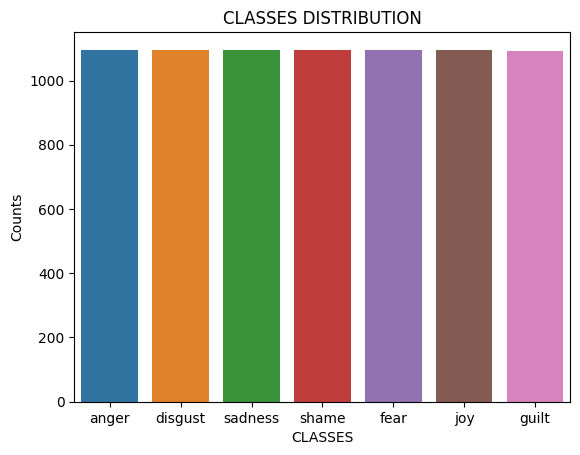

In [7]:
#Classes Distribution
value_indexs=df.Target.value_counts().index
values_Counts=df.Target.value_counts()

sns.barplot(x=value_indexs,y=values_Counts)
plt.xlabel("CLASSES")
plt.ylabel("Counts")
plt.title("CLASSES DISTRIBUTION")
plt.show()

 Obeservation:
 
 The dataset is not imblanced every class datapoints in approximately equal number of points. 
 
 We have seven Classes.
 
 

In [8]:
#models=["KNN","NB","LR","DT","RF","SVM"]
#overAll_Train_accuracy=[]
#overAll_Test_accuracy=[]


#Separating the traget classes
y_df=pd.DataFrame(df["Target"])
final_df=df.drop("Target",axis=1)


#Encodeing the target variable
y_df['Target']=y_df['Target'].map({'anger':0,'disgust':1,'sadness':2,'shame':3,'fear':4,'joy':5,'guilt':6})

y_df=np.array(y_df)
y_df = np.ravel(y_df)

In [9]:
#vectorizing the text of whole corpus Throug BOW count vecterizor


# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Vectorize the corpus
vectorized_data = vectorizer.fit_transform(final_df['Text'])

vectorized_data

<7666x8934 sparse matrix of type '<class 'numpy.int64'>'
	with 129343 stored elements in Compressed Sparse Row format>

In [10]:
#spliting the data into train, test sets
X_train, X_test, y_train, y_test = train_test_split(vectorized_data, y_df, test_size=0.20,random_state=42)

#spliting the train test into train and cross-validation sets
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20)

<a id=1></a>
# 1: Directly Train Models

<a id=1.1></a>
### 1.1: K Nearest Knighbours KNN

In [11]:
#creating KNN Model
clf=KNeighborsClassifier()
clf.fit(X_train, y_train)


# Calculate accuracy score
accuracy = accuracy_score(y_train,clf.predict(X_train))
print("Train_Accuracy:", accuracy*100)
overAll_Train_accuracy.append(accuracy)

print("="*100)

# Calculate accuracy score
accuracy = accuracy_score(y_test,clf.predict(X_test))
print("Test_Accuracy:", accuracy*100)
overAll_Test_accuracy.append(accuracy)
print("="*100)


Train_Accuracy: 49.592302674494455
Test_Accuracy: 28.748370273794006


<a id=1.1.1></a>
# 1.1.1: [KNN-Performance Metrics](#1000)

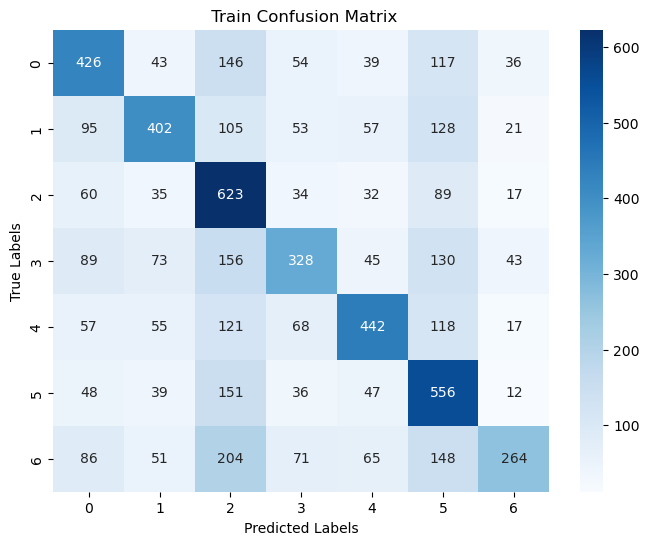

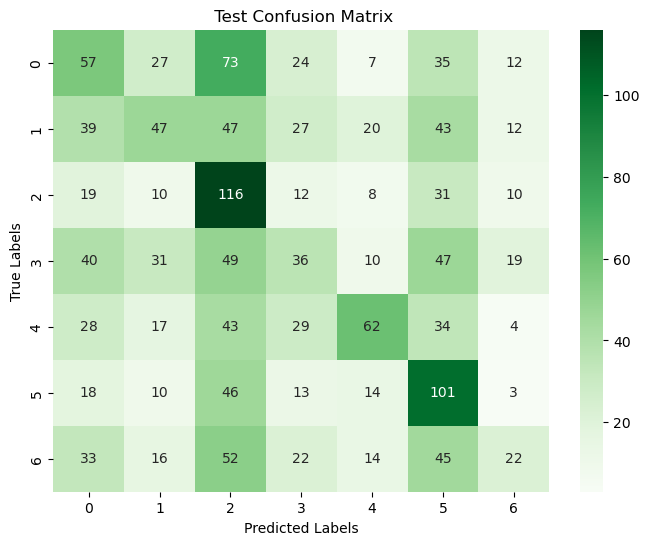

In [12]:
#comfusion metric of Train set
cm = confusion_matrix(y_train, clf.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)
#confusion metric of Test set
cm = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<a id=1.2></a>
# 1.2: [Navie Bayes-NB](#1000)

In [13]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

# Calculate accuracy of trian set
accuracy = accuracy_score(y_train, nb_classifier.predict(X_train))
overAll_Train_accuracy.append(accuracy)
print("Accuracy:", accuracy*100)

print("="*100)

# Calculate accuracy of trian set
accuracy = accuracy_score(y_test, nb_classifier.predict(X_test))
print("Accuracy:", accuracy*100)
overAll_Test_accuracy.append(accuracy)
print("="*100)





Accuracy: 79.20743639921723
Accuracy: 55.80182529335072


<a id=1.2.1></a>
# 1.2.1: NB-Performace Metrics

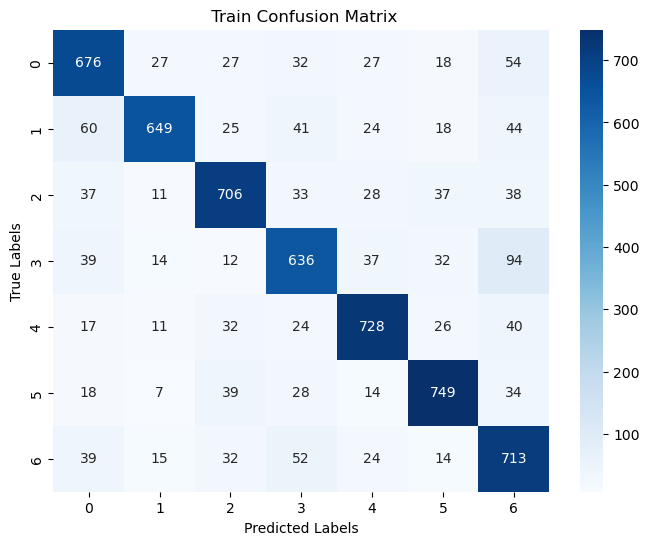

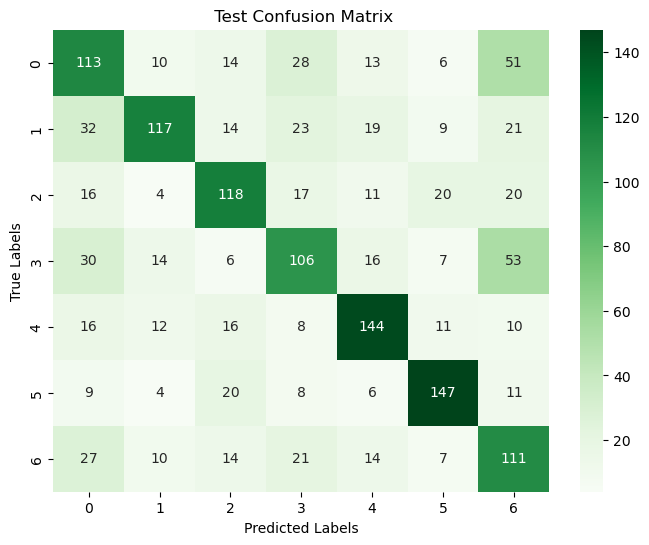

In [14]:
#comfusion metric of Train set
cm = confusion_matrix(y_train, nb_classifier.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)


#confusion metric of Test set
cm = confusion_matrix(y_test, nb_classifier.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<a id=1.3></a>
# 1.3: [Logistic Regression-LR](#1000) 

In [15]:
# Train a logistic regression model
Lr = LogisticRegression(multi_class='multinomial',solver="sag")
Lr.fit(X_train, y_train)


# Make predictions on the train set
y_pred = Lr.predict(X_train)
# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print('Train_Accuracy:', accuracy)
overAll_Train_accuracy.append(accuracy)
print("="*100)

# Calculate accuracy on Test Set
accuracy = accuracy_score(y_test, Lr.predict(X_test))
print('Test_Accuracy:', accuracy)
overAll_Test_accuracy.append(accuracy)

Train_Accuracy: 0.9354207436399217
Test_Accuracy: 0.559322033898305


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<a id=1.3.1></a>
# 1.3.1: LR-Performance Metrics

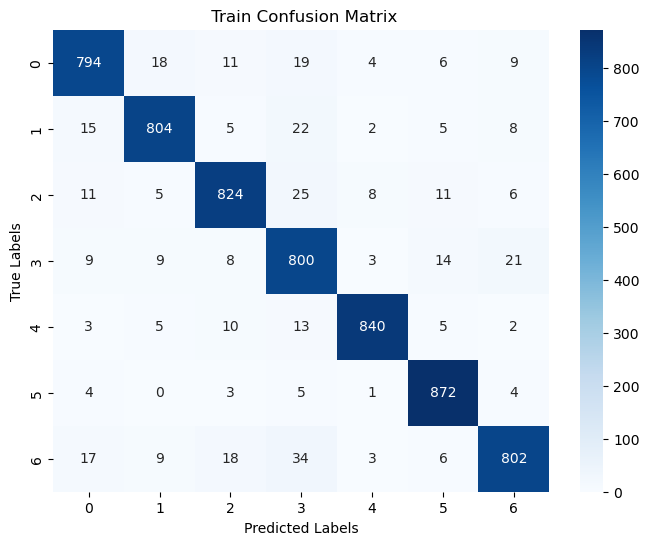

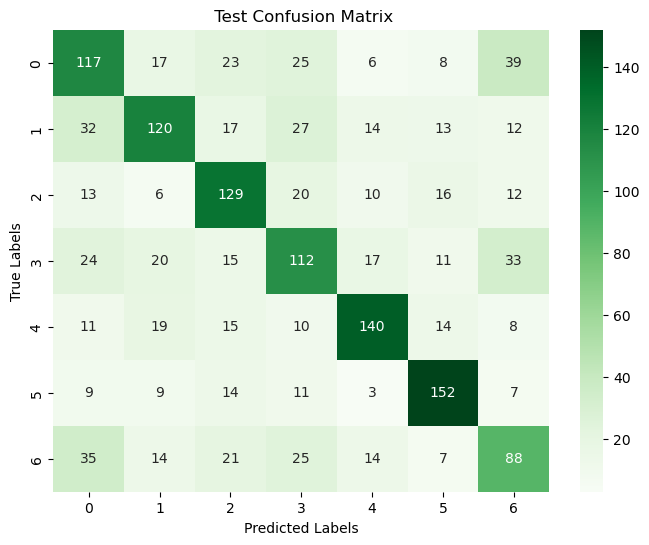

In [16]:
#confusion Metrics
#comfusion metric of Train set
cm = confusion_matrix(y_train, Lr.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)


#confusion metric of Test set
cm = confusion_matrix(y_test, Lr.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<a id=1.4></a>
# 1.4: [Decision Tree-DT](#1000)

In [17]:

# Train a decision tree model
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)

# Make predictions on the Trainset
y_pred = Dt.predict(X_train)

# Calculate accuracy on Train Set
accuracy = accuracy_score(y_train, y_pred)
print('Train_Accuracy:', accuracy)
overAll_Train_accuracy.append(accuracy)
print("="*100)


# Calculate accuracy on Test Set
accuracy = accuracy_score(y_test, Dt.predict(X_test))
print('Test_Accuracy:', accuracy)
overAll_Test_accuracy.append(accuracy)

Train_Accuracy: 0.9882583170254403
Test_Accuracy: 0.45632333767926986


<a id=1.4.1></a>
# 1.4.1: DT-Performance Metrics

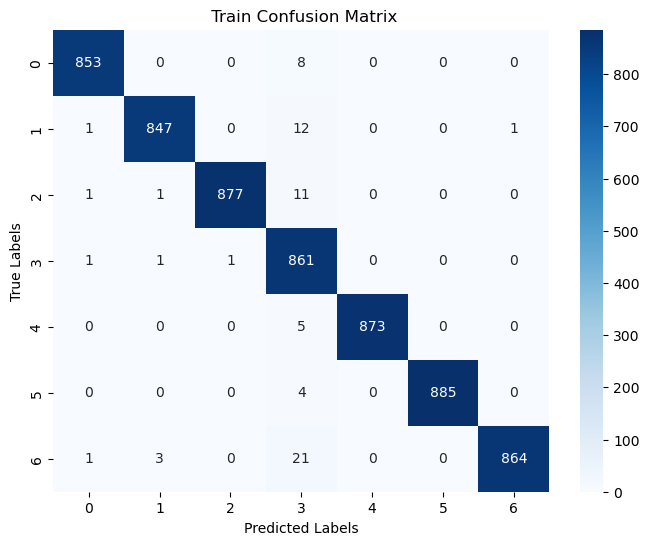

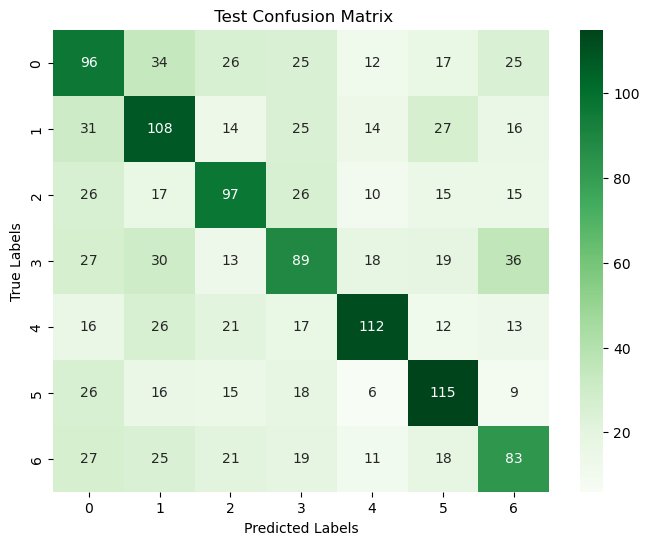

In [18]:
# confusion
#confusion Metrics
#comfusion metric of Train set
cm = confusion_matrix(y_train, Dt.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)


#confusion metric of Test set
cm = confusion_matrix(y_test, Dt.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<a id=1.5></a>
# 1.5: [Random Forest-RF](#1000)

In [19]:
# Create the model
Rf = RandomForestClassifier()
# Train the model
Rf.fit(X_train, y_train)


# Evaluate the model's Train set accuracy
accuracy = accuracy_score(y_train, Rf.predict(X_train))
overAll_Train_accuracy.append(accuracy)
print("Train_Accuracy:", accuracy*100)

print("="*100)


# Evaluate the model's Test set accuracy
accuracy = accuracy_score(y_test, Rf.predict(X_test))
overAll_Test_accuracy.append(accuracy)
print("Test_Accuracy:", accuracy*100)

print("="*100)




Train_Accuracy: 98.82583170254404
Test_Accuracy: 53.063885267275104


<a id=1.5.1></a>
# 1.5.1: RF-Performance Metrics

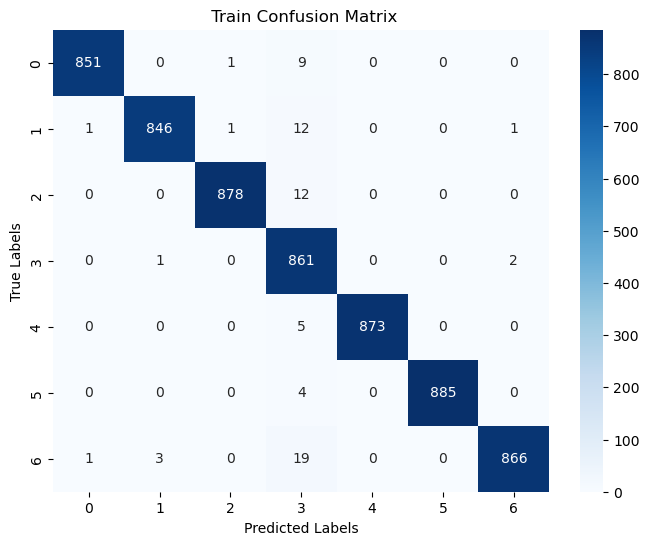

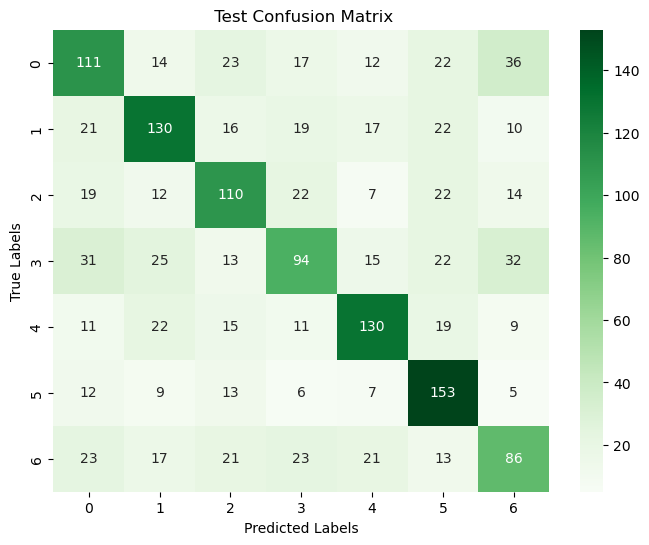

In [20]:
#comfusion metric of Train set
cm = confusion_matrix(y_train, Rf.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)


#confusion metric of Test set
cm = confusion_matrix(y_test, Rf.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<a id=1.6></a>
# 1.6: [Support Vector Machine-SVM](#1000)

In [21]:


# Train an SVM model
Svm = SVC(kernel='linear')
Svm.fit(X_train, y_train)

# Make predictions on the train set
y_pred = Svm.predict(X_train)

# Calculate accuracy of Train Set
accuracy = accuracy_score(y_train, y_pred)
print('Train Accuracy:', accuracy)
overAll_Train_accuracy.append(accuracy)
print("="*100)

# Calculate accuracy of Test set.
accuracy = accuracy_score(y_test, Svm.predict(X_test))
print('Test_Accuracy:', accuracy)
overAll_Test_accuracy.append(accuracy)


Train Accuracy: 0.9712981082844097
Test_Accuracy: 0.5254237288135594


<a id=1.6.1></a>
# 1.6:SVM-Performance Metrics

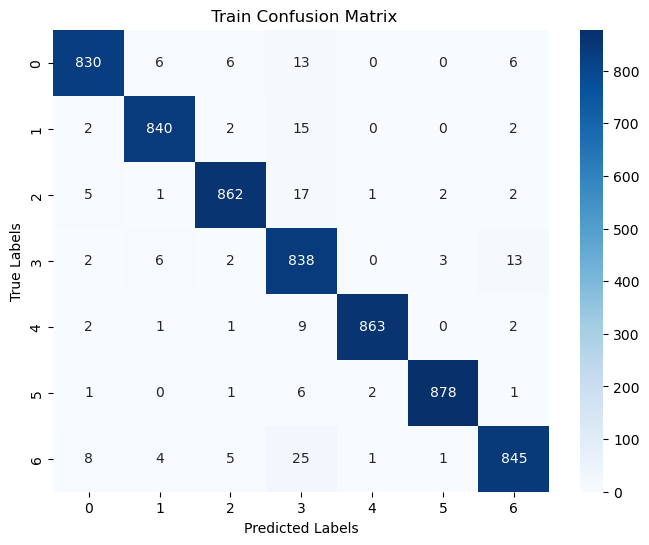

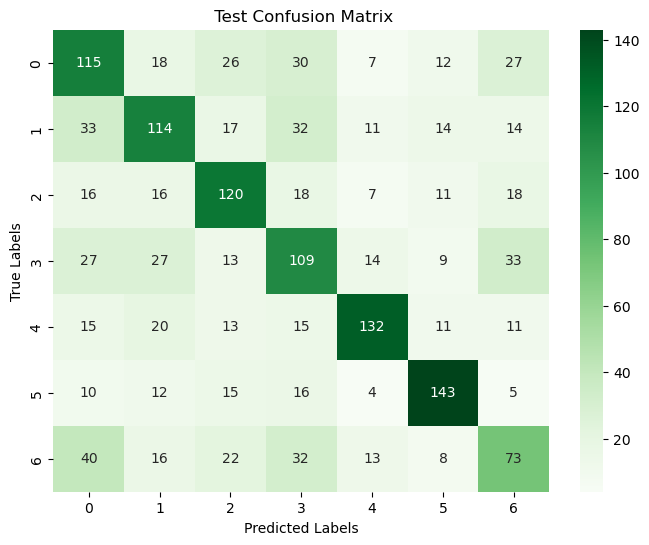

In [22]:
#comfusion metric of Train set
cm = confusion_matrix(y_train, Svm.predict(X_train))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(" Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("="*100)


#confusion metric of Test set
cm = confusion_matrix(y_test, Svm.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(" Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model on the training data
gb_model.fit(X_train, y_train)

y_tr=gb_model.predict(X_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

accuracy=accuracy_score(y_train,y_tr)

print("Train accuracy is:",accuracy)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Train accuracy is: 0.6769406392694064
Accuracy on the test set: 0.5332464146023468


In [13]:
import xgboost as xgb

# Create an XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the training data
y_tr = xgb_model.predict(X_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate training accuracy
accuracy_train = accuracy_score(y_train, y_tr)
print("Train accuracy is:", accuracy_train)

# Evaluate the model's performance on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy_test)


Train accuracy is: 0.7252120026092629
Accuracy on the test set: 0.5267275097783573


<a id=A></a>
# A: [accuracy chart---Directly Train Models](#1000)

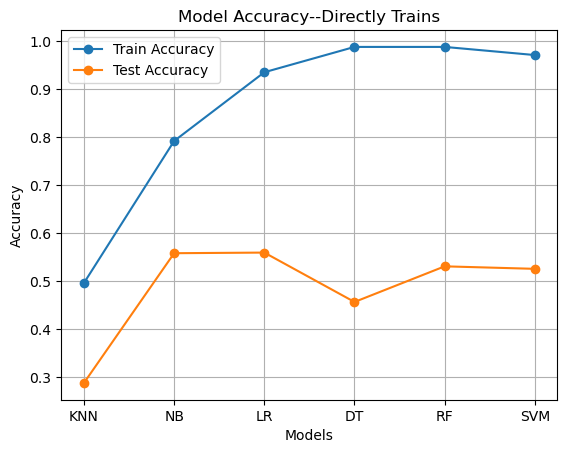

In [23]:

# Plotting the line chart
plt.plot(models, overAll_Train_accuracy, marker='o', label='Train Accuracy')
plt.plot(models, overAll_Test_accuracy, marker='o', label='Test Accuracy')

# Set the chart title and labels
plt.title('Model Accuracy--Directly Trains')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.grid(True)
# Add a legend
plt.legend()